In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [2]:
df = pd.read_csv("toxity_per_attribute.csv", dtype=str, 
    low_memory=False)

# due to issues of data integrity and memory issues, forcing all datatypes into string, and will have to clean the data manually from there

In [3]:
# manual conversion of values into workable format:
df.replace({"TRUE": 1, "FALSE": 0, "True": 1, "False": 0}, inplace=True)

# making this notebook scalable for future reference by explictly resolving type inference (per https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.infer_objects.html
df = df.infer_objects(copy=False)

# ensuring toxicity is made into a float to preserve decimal places:
df['TOXICITY'] = pd.to_numeric(df['TOXICITY'], errors='coerce')

/var/folders/1p/55zf00x17kv1bw300f79xsnr0000gn/T/ipykernel_72267/2270381684.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"TRUE": 1, "FALSE": 0, "True": 1, "False": 0}, inplace=True)


In [4]:
# creating new indentifiers for each identity column and allow for handling the data that is missing values or data
identification_cols = df.columns.difference(['Wiki_ID', 'TOXICITY']) # make sure that the only columns affected are the non-unique id + toxicity value columns
df[identification_cols] = df[identification_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int) # fill na values, make everything else into integerss

In [5]:
print(category_maps_numerical)
print(df.dtypes)
print(df.head())
print(df.shape())

NameError: name 'category_maps_numerical' is not defined

In [7]:
# make subcategories into protected class categories for mapping purposes

category_maps = {
    # Sexuality
    'lesbian': 'sexuality',
    'gay': 'sexuality',
    'bisexual': 'sexuality',
    'transgender': 'sexuality',
    'trans': 'sexuality',
    'queer': 'sexuality',
    'lgbt': 'sexuality',
    'lgbtq': 'sexuality',
    'homosexual': 'sexuality',
    'straight': 'sexuality',
    'heterosexual': 'sexuality',

    # Gender
    'male': 'gender',
    'female': 'gender',
    'nonbinary': 'gender',

    # Race
    'black': 'race',
    'white': 'race',
    'asian': 'race',

    # Ethnicity
    'african american': 'ethnicity',
    'hispanic': 'ethnicity',
    'latino': 'ethnicity',
    'latina': 'ethnicity',
    'latinx': 'ethnicity',

    # National Origin
    'african': 'national_origin',
    'mexican': 'national_origin',
    'canadian': 'national_origin',
    'american': 'national_origin',
    'european': 'national_origin',
    'indian': 'national_origin',
    'chinese': 'national_origin',
    'japanese': 'national_origin',
    'middle eastern': 'national_origin',

    # Religion
    'christian': 'religion',
    'muslim': 'religion',
    'jewish': 'religion',
    'buddhist': 'religion',
    'catholic': 'religion',
    'protestant': 'religion',
    'sikh': 'religion',
    'taoist': 'religion',

    # Age
    'old': 'age',
    'older': 'age',
    'young': 'age',
    'younger': 'age',
    'teenage': 'age',
    'millenial': 'age',
    'middle aged': 'age',
    'elderly': 'age',

    # Disability
    'blind': 'disability',
    'deaf': 'disability',
    'paralyzed': 'disability',
}

In [ ]:
# summary table of each identify column and make sure to see if there are any missing data fields present in any of the identification columns

for columns in identification_cols:
    print(f"{columns}: ", end="")
    identification_counts = df[columns].value_counts(dropna=False)
    summarization = ", ".join([f"{val} - {identification_counts}" for val, count in identification_counts.items()])
    print(summarization)

In [8]:
# List of new column names for protected classes for easy integration into a pandas df
new_columns = ['sexuality', 'gender', 'race', 'ethnicity', 
               'national_origin', 'religion', 'age', 'disability']

# Add each new column with the default value np.nan
for col in new_columns:
    df[col] = np.nan


In [9]:
# numerical mapping for the different classes and subgroups

category_maps_numerical = {
    # Sexuality
    'lesbian': 1,
    'gay': 2,
    'bisexual': 3,
    'transgender': 4,
    'trans': 5,
    'queer': 6,
    'lgbt': 7,
    'lgbtq': 8,
    'homosexual': 9,
    'straight': 10,
    'heterosexual': 11,

    # Gender
    'male': 1,
    'female': 2,
    'nonbinary': 3,

    # Race
    'black': 1,
    'white': 2,
    'asian': 3,

    # Ethnicity
    'african american': 1,
    'hispanic': 2,
    'latino': 3,
    'latina': 4,
    'latinx': 5,

    # National Origin
    'african': 1,
    'mexican': 2,
    'canadian': 3,
    'american': 4,
    'european': 5,
    'indian': 6,
    'chinese': 7,
    'japanese': 8,
    'middle eastern': 9,

    # Religion
    'christian': 1,
    'muslim': 2,
    'jewish': 3,
    'buddhist': 4,
    'catholic': 5,
    'protestant': 6,
    'sikh': 7,
    'taoist': 8,

    # Age
    'old': 1,
    'older': 2,
    'young': 3,
    'younger': 4,
    'teenage': 5,
    'millenial': 6,
    'middle aged': 7,
    'elderly': 8,

    # Disability
    'blind': 1,
    'deaf': 2,
    'paralyzed': 3,
}

In [10]:
# Create a defaultdict with list as the default type to group keywords by category  
category_to_keywords = defaultdict(list)

# Iterate through each keyword-category pair from the original mapping  
for keyword, category in category_maps.items():
    # Add the keyword to its category's list in the dictionary  
    category_to_keywords[category].append(keyword)

# Step 2: Row-wise population of category columns  
for category, keywords in category_to_keywords.items():  
    # Only keep keywords that are actually columns in the DataFrame to avoid errors  
    existing_keywords = [kw for kw in keywords if kw in df.columns]

    # Define a function to collect   all non-zero values for keywords in a row  
    def collect_active_keywords(row):  
        active = [
            kw for kw in existing_keywords
            # Check if the value is not 0, 0.0, None, or NaN after conversion  
            if pd.to_numeric(row[kw], errors='coerce') not in [0, 0.0, None, float('nan')]
        ]
        # Join all active   keywords with a comma, or return None if no active ones found  
        return ', '.join(active) if active else None  # This line jons valid entries together

    # Apply the function to every row in the DataFrame for this category column  
    df[category] = df.apply(collect_active_keywords, axis=1)  # Replacces values in the new column with detected labels


In [ ]:

# double check if any rows have any double identity entries
comma_mask = df.astype(str).apply(lambda col: col.str.contains(',', na=False))
df[comma_mask]

In [ ]:
# Keep only rows where at least one of the new_columns is not empty or zero
df_filtered = df[df[new_columns].apply(lambda row: any(x not in [None, '', 0, '0'] for x in row), axis=1)]

# 2. Keep only Wiki_ID, TOXICITY, and the new_columns
df_filtered = df_filtered[['Wiki_ID', 'TOXICITY'] + new_columns]

print(df_filtered.head())

In [11]:
# Keep only rows where at least one of the new_columns is not empty or zero
df_filtered = df[df[new_columns].apply(lambda row: any(x not in [None, '', 0, '0'] for x in row), axis=1)]

# 2. Keep only Wiki_ID, TOXICITY, and the new_columns
df_filtered = df_filtered[['Wiki_ID', 'TOXICITY'] + new_columns]

# print(df_filtered.head())

  Wiki_ID  TOXICITY   sexuality gender  race ethnicity national_origin  \
0       0  0.096492        None   None  None      None        american   
1       1  0.017991       trans   None  None      None            None   
2       2  0.150298  homosexual   None  None      None            None   
3       3  0.065861        None   None  None      None         mexican   
4       4  0.667166        None   None  None      None            None   

  religion   age disability  
0     None  None       None  
1     None  None       None  
2     None  None       None  
3     None  None       None  
4     sikh  None       None  


In [13]:
# finding 1514 examples of list "african" and "american" in national origin, comparing with ethnicity "african american" to make sure if there's any data loss with disincluding the national origin label

# Identify rows where national_origin is a list containing only [1, 4]  (which represents 'african' and 'american')
african_american_nat = df_filtered['national_origin'].apply(
    lambda x: isinstance(x, list) and set(x) == {1, 4}
)

# Print number of rows that match ['african', 'american']   exactly in national_origin
print(f"Rows with ['african', 'american'] as national_origin: {african_american_nat.sum()}")

# Get the numeric code for 'african american'   from the mapping
ethnicity_code = category_maps_numerical.get("african american", None)

# Find mismatches where ethnicity is NOT properly set   despite national_origin being ['african', 'american']
mismatched_rows = df_filtered[african_american_nat & (df_filtered['ethnicity'] != ethnicity_code)]

# Show how many rows are inconsistent   with their ethnicity field
print(f"Rows that have ['african', 'american'] in national_origin but NOT 'african american' in ethnicity: {len(mismatched_rows)}")

# Optionally preview problematic  rows for validation
mismatched_rows[['Wiki_ID', 'national_origin', 'ethnicity']]

# Retrieve numeric code  for 'african american' from category map (defaults to 0 if not found)
african_american_code = category_maps_numerical.get("african american", 0)

# Build a mask to select rows with raw text values 'african' and 'american'  (pre-mapped form)
mask = df_filtered['national_origin'].apply(lambda x: isinstance(x, list) and set(x) == {'african', 'american'})

# Set ethnicity to 'african american' code  where national_origin suggests that identity
df_filtered.loc[mask, 'ethnicity'] = df_filtered.loc[mask, 'ethnicity'].replace(0, african_american_code)

# Clear the national_origin field  for these rows (replacing with 0)
df_filtered.loc[mask, 'national_origin'] = 0

# Check types in each protected class column   to confirm no lists remain or unwanted types
for col in new_columns:
    print(f"{col}:")
    print(df_filtered[col].map(type).value_counts())  # Ensuring consistency in column datatypes accross df

Rows with ['african', 'american'] as national_origin: 0
Rows that have ['african', 'american'] in national_origin but NOT 'african american' in ethnicity: 0
sexuality:
sexuality
<class 'NoneType'>    59046
<class 'str'>         16654
Name: count, dtype: int64
gender:
gender
<class 'NoneType'>    71158
<class 'str'>          4542
Name: count, dtype: int64
race:
race
<class 'NoneType'>    71158
<class 'str'>          4542
Name: count, dtype: int64
ethnicity:
ethnicity
<class 'NoneType'>    68130
<class 'str'>          7570
Name: count, dtype: int64
national_origin:
national_origin
<class 'NoneType'>    60560
<class 'str'>         15140
Name: count, dtype: int64
religion:
religion
<class 'NoneType'>    63588
<class 'str'>         12112
Name: count, dtype: int64
age:
age
<class 'NoneType'>    63588
<class 'str'>         12112
Name: count, dtype: int64
disability:
disability
<class 'NoneType'>    71158
<class 'str'>          4542
Name: count, dtype: int64


In [17]:
# Define function to clean values and map them numerically  using the provided mapping
def clean_and_map(val, mapping):
    # Check if value is NaN, empty, '0', 0, or None   → treat as no data (map to 0)
    if pd.isna(val) or val in ['', '0', 0, None]:
        return 0
    # Handling values that are lists or comma-separated strings (forr example: multiple group labels)
    if isinstance(val, list):
        val = val[0]  # Take only the first eleemnt   from the list
    elif isinstance(val, str) and ',' in val:
        val = val.split(',')[0].strip()  # Take first item from comma string  only
    # Lookup cleaned value in mapping   and return corresponding numeric code
    return mapping.get(val.strip(), 0)

# Loop through each column in the selected list of protected class categories
for col in new_columns:
    # Create a sub-mapping  from full category map that matches this class group
    sub_map = {k: v for k, v in category_maps_numerical.items() if category_maps.get(k) == col}
    
    # Apply the clean_and_map  function to each value in the column
    df_filtered[col] = df_filtered[col].apply(lambda x: clean_and_map(x, sub_map))  # Clens and encodes each value

In [18]:
# 1. Compute correlations with TOXICITY
correlation_data = []
for col in new_columns:
    if df_filtered[col].apply(lambda x: isinstance(x, list)).any():
        # Flatten list values to their first entry for correlation
        df_filtered[col + '_flattened'] = df_filtered[col].apply(lambda x: x[0] if isinstance(x, list) else x)
        corr = df_filtered['TOXICITY'].corr(df_filtered[col + '_flattened'])
    else:
        corr = df_filtered['TOXICITY'].corr(df_filtered[col])
    correlation_data.append((col, corr))

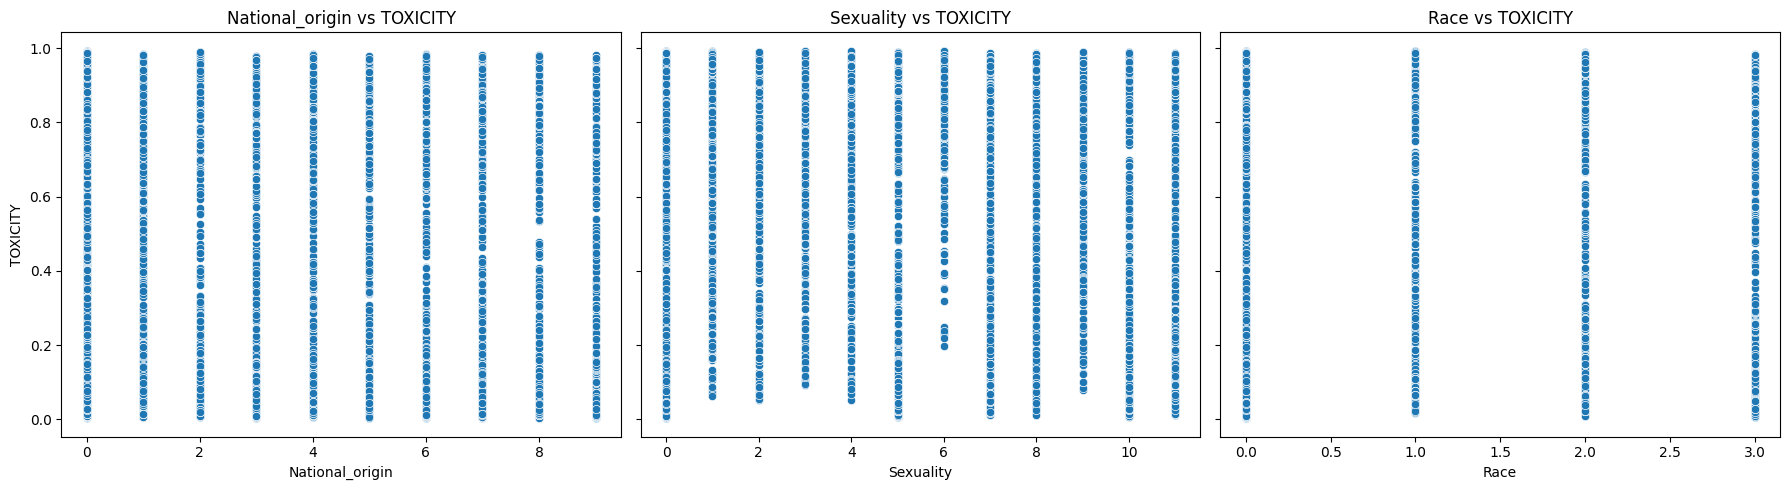

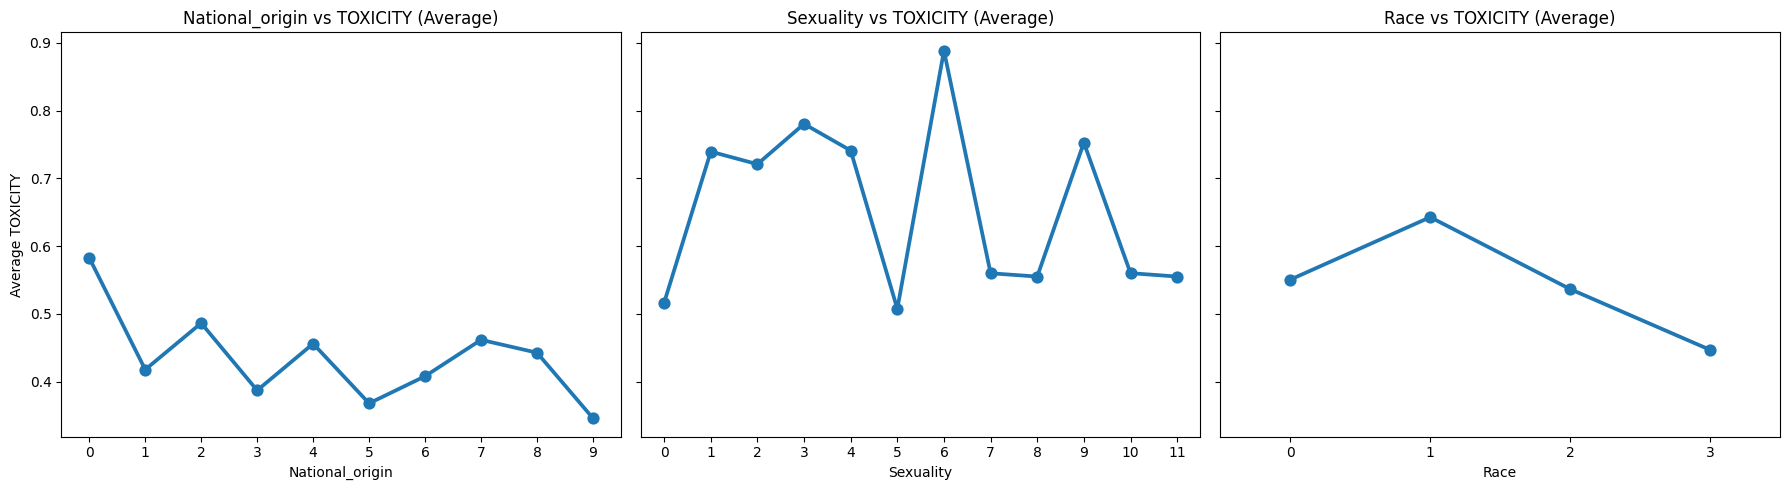

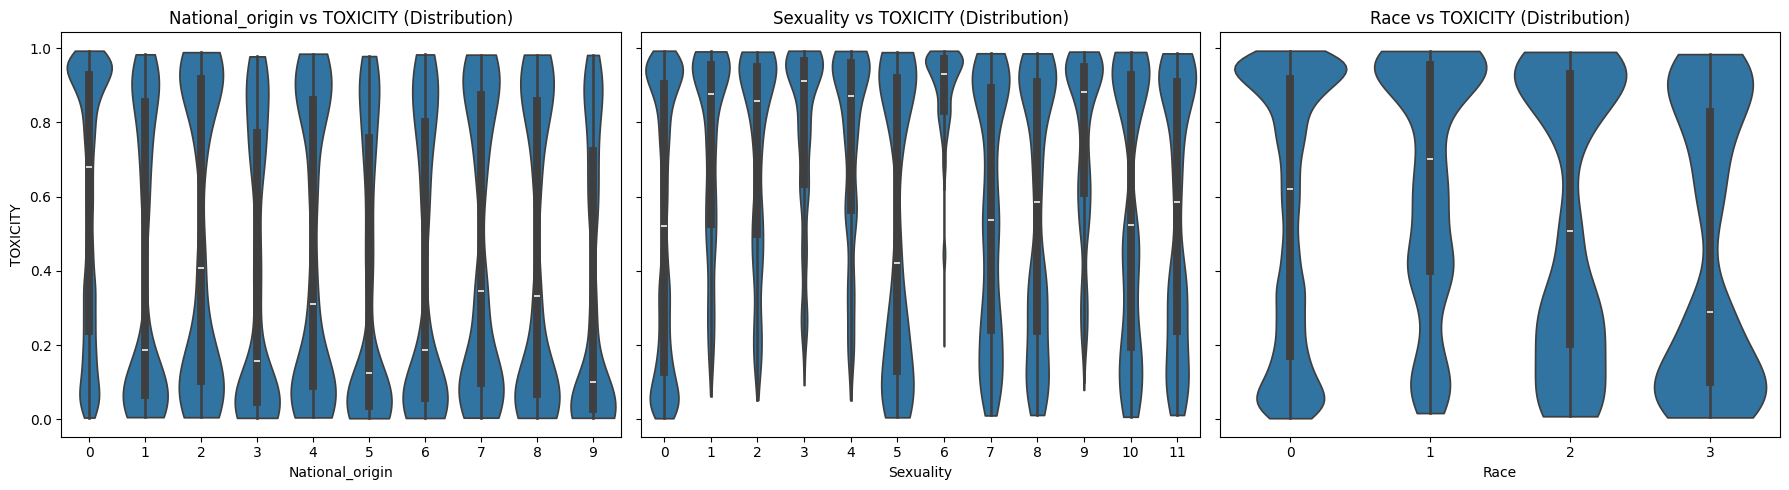

In [31]:
# Scatter Plot: Shows all individual TOXICITY values per class group for the top 3 features
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # Create a row of 3 subplots
for i, feature in enumerate(top_3_features):
    # Use '_flattened' version of the column if available
    col = feature + '_flattened' if feature + '_flattened' in df_filtered.columns else feature
    
    # Create scatter plot for each feature vs TOXICITY
    sns.scatterplot(data=df_filtered, x=col, y='TOXICITY', ax=axes[i])
    
    # Set titles and labels
    axes[i].set_title(f'{feature.capitalize()} vs TOXICITY')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('TOXICITY')

plt.tight_layout()
plt.show()


# Point Plot: Shows the average TOXICITY per subgroup of each top 3 class
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, protected_class in enumerate(top_3_classes):
    # Use '_flattened' column if it exists
    col_name = protected_class + '_flattened' if protected_class + '_flattened' in df_filtered.columns else protected_class

    # Create a point plot with mean TOXICITY per class value
    sns.pointplot(
        data=df_filtered,
        x=col_name,
        y='TOXICITY',
        estimator='mean',
        errorbar=None,       # suppress confidence intervals (replaced 'ci=None' due to deprecation warnning)
        ax=axes[i]
    )
    
    # Add labels and titles
    axes[i].set_title(f'{protected_class.capitalize()} vs TOXICITY (Average)')
    axes[i].set_xlabel(protected_class.capitalize())
    axes[i].set_ylabel('Average TOXICITY')

plt.tight_layout()
plt.show()


# Violin Plot: Shows full distribution of TOXICITY per subgroup, including spread  and central tendency
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, protected_class in enumerate(top_3_classes):
    col_name = protected_class + '_flattened' if protected_class + '_flattened' in df_filtered.columns else protected_class

    # Create a violin plot showing the distribution of TOXICITY per value of the class
    sns.violinplot(
        data=df_filtered,
        x=col_name,
        y='TOXICITY',
        ax=axes[i],
        inner='box',      # Overlay boxplot within  the violin for median/IQR
        scale='width',    # Scale violin width by number of observations
        cut=0             # Prevent extrapolation beyond observed data
    )
    
    # Annotate axes
    axes[i].set_title(f'{protected_class.capitalize()} vs TOXICITY (Distribution)')
    axes[i].set_xlabel(protected_class.capitalize())
    axes[i].set_ylabel('TOXICITY')

plt.tight_layout()
plt.show()

In [20]:
# 1. Compute correlations with TOXICITY
correlation_data = []
for col in new_columns:
    if df_filtered[col].apply(lambda x: isinstance(x, list)).any():
        # Flatten list values to their first entry for correlation
        df_filtered[col + '_flattened'] = df_filtered[col].apply(lambda x: x[0] if isinstance(x, list) else x)
        corr = df_filtered['TOXICITY'].corr(df_filtered[col + '_flattened'])
    else:
        corr = df_filtered['TOXICITY'].corr(df_filtered[col])
    correlation_data.append((col, corr))

In [26]:
# Step 2: Define a function to categorize the strength of correlation   useng Evans (1996) as a reference
def get_correlation_strength(corr_value):  
    abs_corr = abs(corr_value)  # Convert correlation to absolute value to ignore direction  of relationship

    if abs_corr < 0.2:  # If abs corr is less than 0.2, classify as very weak
        return "very weak"
    elif abs_corr < 0.4:  # If between 0.2 and 0.4, label as weak
        return "weak"
    elif abs_corr < 0.6:  # Between 0.4 and 0.6 is considered moderate  correlation
        return "moderate"
    elif abs_corr < 0.8:  # Between 0.6 and 0.8 means strong correlation
        return "strong"
    else:  # 0.8 or higher is classified as very strong
        return "very strong"

# Step 3: Create a DataFrame to store correlation results  for each protected class
correlation_results_df = pd.DataFrame(correlation_data, columns=['Protected Class', 'Correlation'])  # Initailize table with columns

# Add a new column for absolute correlation values to ignore negative/positive sign
correlation_results_df['Absolute Correlation'] = correlation_results_df['Correlation'].abs()

# Apply the classification  function to each absolute correlation value
correlation_results_df['Strength'] = correlation_results_df['Absolute Correlation'].apply(get_correlation_strength)

# Display the full correlation table   showing class, value, abs, and strength
print(correlation_results_df)

# Step 4: Select the top 3 protected classes with the highest absolute correlation to TOXICITY
top_3_correlations = correlation_results_df.sort_values(by='Absolute Correlation', ascending=False).head(3)  # Sort and fetch top 3 rows

# Extract just the names of those top 3 classes into a list for further plotting
top_3_classes = top_3_correlations['Protected Class'].tolist()  # Get class names

# Print the rows with top 3 correlations   for visual inspeection
print(top_3_correlations)

# Print just the list of class names for plotting or  further analysis
print(top_3_classes)

   Protected Class  Correlation  Absolute Correlation   Strength
0        sexuality     0.112540              0.112540  very weak
1           gender     0.016819              0.016819  very weak
2             race    -0.026105              0.026105  very weak
3        ethnicity     0.005209              0.005209  very weak
4  national_origin    -0.158511              0.158511  very weak
5         religion     0.017873              0.017873  very weak
6              age    -0.020994              0.020994  very weak
7       disability     0.012026              0.012026  very weak
   Protected Class  Correlation  Absolute Correlation   Strength
4  national_origin    -0.158511              0.158511  very weak
0        sexuality     0.112540              0.112540  very weak
2             race    -0.026105              0.026105  very weak
['national_origin', 'sexuality', 'race']


In [36]:
# Step 3:

# 1. Full population toxicity statistics
population_toxicity_mean = df_filtered['TOXICITY'].mean()
population_toxicity_stddev = df_filtered['TOXICITY'].std(ddof=0)  # Population standard deviation

# Approximate 95% confidence interval range using ±2 standard deviations
toxicity_95_percent_range = (
    population_toxicity_mean - 2 * population_toxicity_stddev,
    population_toxicity_mean + 2 * population_toxicity_stddev
)

print("=== Full Population Stats ===")
print(f"Population Mean TOXICITY: {population_toxicity_mean:.5f}")
print(f"Population Std Dev: {population_toxicity_stddev:.5f}")
print(f"Approx. 95% Range (95% CI): {toxicity_95_percent_range[0]:.5f} to {toxicity_95_percent_range[1]:.5f}")


# Function to create and store a named sample from the dataset
def create_named_sample(input_dataframe, sample_fraction):
    fraction_label = f"{int(sample_fraction * 100)}percent"
    sample_variable_name = f"sample_{fraction_label}_size"
    sampled_dataframe = input_dataframe.sample(frac=sample_fraction, random_state=42)
    globals()[sample_variable_name] = sampled_dataframe  # Save the sample globally using dynamic name
    print(f"\nSample '{sample_variable_name}' created with {len(sampled_dataframe)} rows.")
    return sampled_dataframe


# Function to compute statistics on a sample dataset
def compute_sample_statistics(sampled_dataframe, z_score=1.96):
    sample_mean_toxicity = sampled_dataframe['TOXICITY'].mean()
    sample_stddev_toxicity = sampled_dataframe['TOXICITY'].std(ddof=1)
    sample_size = len(sampled_dataframe)
    margin_of_error = z_score * (sample_stddev_toxicity / np.sqrt(sample_size))
    return sample_mean_toxicity, sample_stddev_toxicity, margin_of_error


# 2. 10% Sample
sample_tenpercent_size = create_named_sample(df_filtered, sample_fraction=0.10)
mean_toxicity_10pct, stddev_toxicity_10pct, moe_10pct = compute_sample_statistics(sample_tenpercent_size)

print("\n=== 10% Sample Stats ===")
print(f"Mean TOXICITY: {mean_toxicity_10pct:.5f}")
print(f"Std Dev: {stddev_toxicity_10pct:.5f}")
print(f"Margin of Error (95% CI): ±{moe_10pct:.5f}")


# 3. 60% Sample
sample_sixtypercent_size = create_named_sample(df_filtered, sample_fraction=0.60)
mean_toxicity_60pct, stddev_toxicity_60pct, moe_60pct = compute_sample_statistics(sample_sixtypercent_size)

print("\n=== 60% Sample Stats ===")
print(f"Mean TOXICITY: {mean_toxicity_60pct:.5f}")
print(f"Std Dev: {stddev_toxicity_60pct:.5f}")
print(f"Margin of Error (95% CI): ±{moe_60pct:.5f}")

=== Full Population Stats ===
Population Mean TOXICITY: 0.55010
Population Std Dev: 0.36185
Approx. 95% Range (95% CI): -0.17360 to 1.27380

Sample 'sample_10percent_size' created with 7570 rows.

=== 10% Sample Stats ===
Mean TOXICITY: 0.54787
Std Dev: 0.36309
Margin of Error (95% CI): ±0.00818

Sample 'sample_60percent_size' created with 45420 rows.

=== 60% Sample Stats ===
Mean TOXICITY: 0.54923
Std Dev: 0.36216
Margin of Error (95% CI): ±0.00333


In [37]:
# Set the protected class column name
protected_class_column = 'national_origin'
z_score_95_confidence = 1.96  # z-score for 95% confidence interval

# Function to calculate stats for a protected class (excluding rows where class value is 0)
def compute_protected_class_statistics(input_dataframe, class_column_name, z_score=z_score_95_confidence):
    nonzero_class_subset = input_dataframe[input_dataframe[class_column_name] != 0]  # Filter rows
    toxicity_mean = nonzero_class_subset['TOXICITY'].mean()
    toxicity_std_dev = nonzero_class_subset['TOXICITY'].std(ddof=1)
    sample_size = len(nonzero_class_subset)
    margin_of_error = z_score * (toxicity_std_dev / np.sqrt(sample_size)) if sample_size > 0 else np.nan
    return toxicity_mean, toxicity_std_dev, margin_of_error, sample_size

# 1. Stats for the full reduced dataset (Step 4.1)
pop_class_mean, pop_class_stddev, pop_class_moe, pop_class_sample_size = compute_protected_class_statistics(
    df_filtered,
    protected_class_column
)
print("=== Step 4.1: Population (Filtered) ===")
print(f"n = {pop_class_sample_size}")
print(f"Mean TOXICITY: {pop_class_mean:.5f}")
print(f"Standard Deviation: {pop_class_stddev:.5f}")

# 2. Stats for the 10% sample (Step 4.2)
sample10_class_mean, sample10_class_stddev, sample10_class_moe, sample10_class_sample_size = compute_protected_class_statistics(
    sample_tenpercent_size,
    protected_class_column
)
print("\n=== Step 4.2: 10% Sample ===")
print(f"n = {sample10_class_sample_size}")
print(f"Mean TOXICITY: {sample10_class_mean:.5f}")
print(f"Standard Deviation: {sample10_class_stddev:.5f}")
print(f"Margin of Error: ±{sample10_class_moe:.5f}")

# 3. Stats for the 60% sample (Step 4.3)
sample60_class_mean, sample60_class_stddev, sample60_class_moe, sample60_class_sample_size = compute_protected_class_statistics(
    sample_sixtypercent_size,
    protected_class_column
)
print("\n=== Step 4.3: 60% Sample ===")
print(f"n = {sample60_class_sample_size}")
print(f"Mean TOXICITY: {sample60_class_mean:.5f}")
print(f"Standard Deviation: {sample60_class_stddev:.5f}")
print(f"Margin of Error: ±{sample60_class_moe:.5f}")

=== Step 4.1: Population (Filtered) ===
n = 15140
Mean TOXICITY: 0.41923
Standard Deviation: 0.38098

=== Step 4.2: 10% Sample ===
n = 1587
Mean TOXICITY: 0.41541
Standard Deviation: 0.37562
Margin of Error: ±0.01848

=== Step 4.3: 60% Sample ===
n = 9130
Mean TOXICITY: 0.41619
Standard Deviation: 0.37999
Margin of Error: ±0.00779

=== Step 4.4: Does Sample Mean Lie Within Population Margin of Error? ===
10% Sample Mean within Margin of Error: Yes
60% Sample Mean within Margin of Error: Yes

=== Step 4.5: Interpretation ===
- 10% Sample:
Yes: The 10% sample mean lies within the margin of error, suggesting it's a reasonable estimate.

- 60% Sample:
Yes: The 60% sample mean lies within the margin of error, suggesting strong alignment with the population.


In [39]:
# Step 5 Parameters

# Mapping of subgroup codes to labels
national_origin_code_to_label = {
    1: 'african',
    2: 'mexican',
    3: 'canadian',
    4: 'american',
    5: 'european',
    6: 'indian',
    7: 'chinese',
    8: 'japanese',
    9: 'middle eastern'
}

# Function to compute toxicity stats for a specific subgroup within the protected class
def compute_subgroup_toxicity_stats(dataframe, class_column, subgroup_code_value, z_score=1.96):
    filtered_subgroup_df = dataframe[dataframe[class_column] == subgroup_code_value]  # Filter subgroup rows
    toxicity_mean_value = filtered_subgroup_df['TOXICITY'].mean()
    toxicity_std_dev = filtered_subgroup_df['TOXICITY'].std(ddof=1)
    subgroup_sample_size = len(filtered_subgroup_df)
    margin_of_error = z_score * (toxicity_std_dev / np.sqrt(subgroup_sample_size)) if subgroup_sample_size > 0 else np.nan
    return toxicity_mean_value, toxicity_std_dev, margin_of_error, subgroup_sample_size

# Initialize lis t to collect all subgroup results
subgroup_statistics_results = []

# Iterate through all national origin subgroups  for statistics calculation
for subgroup_code, subgroup_label in national_origin_code_to_label.items():
    # 1. Population stats for the subgroup
    population_mean_tox, population_std_tox, _, population_sample_size = compute_subgroup_toxicity_stats(
        df_filtered, protected_class, subgroup_code
    )

    # 2. Stats for 10.% sample for the subgroup
    sample10_mean_tox, sample10_std_tox, sample10_moe_tox, sample10_sample_size = compute_subgroup_toxicity_stats(
        sample_tenpercent_size, protected_class, subgroup_code
    )
    sample10_mean_in_confidence_range = (
        (sample10_mean_tox >= (population_mean_tox - sample10_moe_tox)) and
        (sample10_mean_tox <= (population_mean_tox + sample10_moe_tox))
    ) if not np.isnan(sample10_moe_tox) else False

    # 3. Stats for 60% sample for the subgroup
    sample60_mean_tox, sample60_std_tox, sample60_moe_tox, sample60_sample_size = compute_subgroup_toxicity_stats(
        sample_sixtypercent_size, protected_class, subgroup_code
    )
    sample60_mean_in_confidence_range = (
        (sample60_mean_tox >= (population_mean_tox - sample60_moe_tox)) and
        (sample60_mean_tox <= (population_mean_tox + sample60_moe_tox))
    ) if not np.isnan(sample60_moe_tox) else False

    # Append all calculated stats for this subgroup to the results list
    subgroup_statistics_results.append({
        'Subgroup Label': subgroup_label,
        'Subgroup Code': subgroup_code,
        'Population Mean Toxicity': round(population_mean_tox, 5),
        'Population Std Dev Toxicity': round(population_std_tox, 5),
        'Population Sample Size': population_sample_size,
        '10% Sample Mean Toxicity': round(sample10_mean_tox, 5),
        '10% Sample Std Dev Toxicity': round(sample10_std_tox, 5),
        '10% Sample Margin of Error': round(sample10_moe_tox, 5),
        '10% Sample Size': sample10_sample_size,
        '10% Mean Within Population MOE': 'Yes' if sample10_mean_in_confidence_range else 'No',
        '60% Sample Mean Toxicity': round(sample60_mean_tox, 5),
        '60% Sample Std Dev Toxicity': round(sample60_std_tox, 5),
        '60% Sample Margin of Error': round(sample60_moe_tox, 5),
        '60% Sample Size': sample60_sample_size,
        '60% Mean Within Population MOE': 'Yes' if sample60_mean_in_confidence_range else 'No'
    })

# Convert list of dicts to DataFrame for better  visualization
subgroup_toxicity_stats_df = pd.DataFrame(subgroup_statistics_results)

# Show all columns when printing
pd.set_option('display.max_columns', None)

print("=== Step 5: National Origin Subgroup Toxicity Analysis ===")
display(subgroup_toxicity_stats_df)

=== Step 5: National Origin Subgroup Toxicity Analysis ===


,Subgroup,Code,Population Mean,Population Std,n_pop,10% Mean,10% Std,10% MOE,10% n,10% In Range,60% Mean,60% Std,60% MOE,60% n,60% In Range
0,african,1,0.41784,0.37965,3028,0.38916,0.36751,0.04230,290,Yes,0.41639,0.37947,0.01742,1823,Yes
1,mexican,2,0.48646,0.39348,1514,0.51914,0.39551,0.06109,161,Yes,0.48494,0.39324,0.02541,920,Yes
2,canadian,3,0.38719,0.37030,1514,0.36771,0.36649,0.05751,156,Yes,0.38146,0.36903,0.02396,911,Yes
3,american,4,0.45609,0.38460,1514,0.43798,0.38582,0.05834,168,Yes,0.44550,0.38510,0.02501,911,Yes
4,european,5,0.36806,0.36652,1514,0.39037,0.36073,0.05170,187,Yes,0.36063,0.36273,0.02331,930,Yes
5,indian,6,0.40810,0.37955,1514,0.41695,0.38101,0.05998,155,Yes,0.41600,0.38200,0.02477,914,Yes
6,chinese,7,0.46178,0.37869,1514,0.48305,0.37059,0.05587,169,Yes,0.45546,0.37443,0.02399,936,Yes
7,japanese,8,0.44281,0.39090,1514,0.41384,0.37661,0.06151,144,Yes,0.44973,0.39198,0.02585,883,Yes
8,middle eastern,9,0.34613,0.36352,1514,0.33774,0.35721,0.05588,157,Yes,0.33503,0.35766,0.02334,902,Yes


/var/folders/1p/55zf00x17kv1bw300f79xsnr0000gn/T/ipykernel_72267/4081514336.py:52: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(


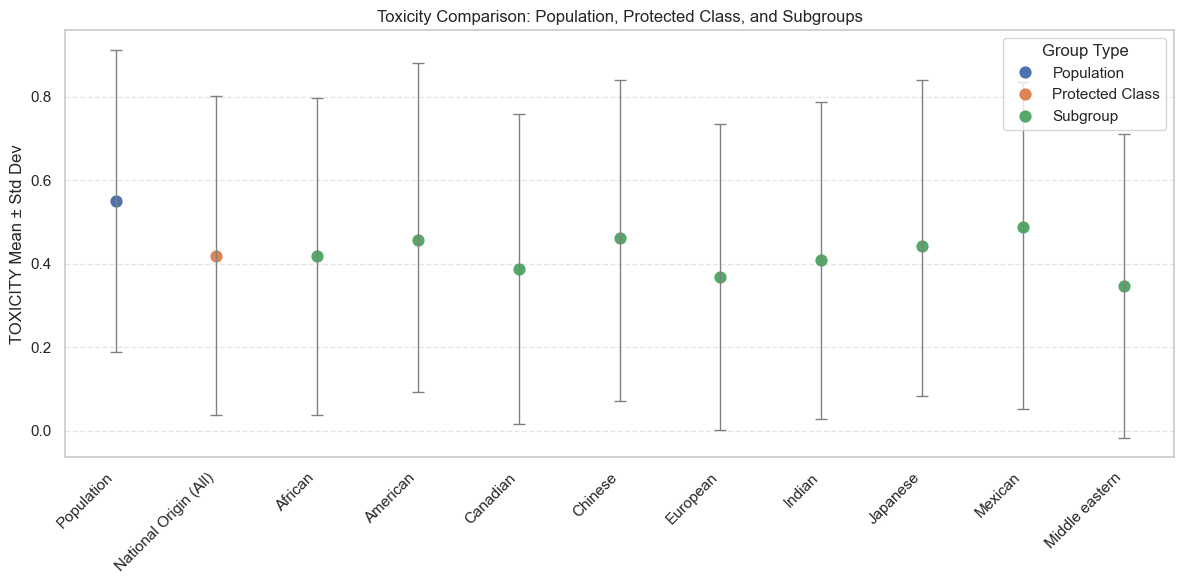

In [40]:
# -- Step 3: Population stats --  # Compute mean toxicity for entire populattion
population_mean = df_filtered['TOXICITY'].mean()  # Mean TOXICITY across all data
population_std = df_filtered['TOXICITY'].std(ddof=0)  # Population standard deviation  (ddof=0)

# -- Step 4: Protected class (e.g., national_origin) overall (non-zero values only) --  # Filter rows where protected class is not zero (active members)
df_national_origin = df_filtered[df_filtered['national_origin'] != 0]  # Subset dataframe for protected class values != 0
protected_mean = df_national_origin['TOXICITY'].mean()  # Mean toxicity for protected class
protected_std = df_national_origin['TOXICITY'].std(ddof=1)  # Sample std dev for protected class

# -- Step 5: Subgroup-level stats (already computed earlier in `subgroup_df`) --  # Use precomputed subgroup stats from prior analysis

# Collect values for plotting  # Initialize list to hold all plotting data points
plot_data = []

# Step 3 - Population  # Append population stats to plot_data list
plot_data.append({
    'Label': 'Population',  # Label for plotting
    'Mean': population_mean,  # Mean value to plot
    'Std': population_std,  # Standard deviation for error bars
    'Type': 'Population'  # Group type category
})

# Step 4 - Protected class  # Append overall protected class stats to plot_data
plot_data.append({
    'Label': 'National Origin (All)',  # Label for protected class group
    'Mean': protected_mean,  # Mean toxicity for protected class
    'Std': protected_std,  # Std dev for error bars
    'Type': 'Protected Class'  # Type identifier for plotting order
})

# Step 5 - Each subgroup  # Loop through each subgroup in the precomputed dataframe
for _, row in subgroup_df.iterrows():
    plot_data.append({
        'Label': row['Subgroup'].capitalize(),  # Capitalize subgroup label for display
        'Mean': row['Population Mean'],  # Mean toxicity for this subgroup
        'Std': row['Population Std'],  # Standard deviation for subgroup toxicity
        'Type': 'Subgroup'  # Mark as subgroup for sorting and coloring
    })

# Convert to DataFrame for plotting  # Transform list of dicts into pandas DataFrame
plot_df = pd.DataFrame(plot_data)  # Ready for seaborn plotting

# -- Plotting --  # Begin figure setup for plot visualization
plt.figure(figsize=(12, 6))  # Set figure size
sns.set(style="whitegrid")  # Apply white grid style for clarity

# Sort so Population and Protected Class come first  # Create sorting order column for plot layering
plot_df['SortOrder'] = plot_df['Type'].map({'Population': 0, 'Protected Class': 1, 'Subgroup': 2})  # Map group types to sort order
plot_df = plot_df.sort_values(by=['SortOrder', 'Label'])  # Sort dataframe by type then label alphabetically

# Plot mean and error bars (std)  # Draw pointplot without errorbars (manual errorbars later)
ax = sns.pointplot(
    data=plot_df,  # Data source
    x='Label',  # X-axis labels
    y='Mean',  # Mean toxicity values as Y
    hue='Type',  # Color points by group type
    dodge=False,  # No dodge effect on points
    join=False,  # Do not join points with lines
    errorbar=None  # Disable built-in error bars (added manually)
)

# Add error bars manually  # Loop to add custom error bars with std dev
for i, row in plot_df.iterrows():
    plt.errorbar(
        x=i,  # Position on x axis
        y=row['Mean'],  # Mean value
        yerr=row['Std'],  # Std deviation as error bar height
        fmt='none',  # No marker for error bar itself
        c='gray',  # Gray color for error bars
        capsize=4,  # Caps on error bars
        linewidth=1  # Line thickness of error bars
    )

# Final formatting  # Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, right aligned
plt.ylabel("TOXICITY Mean ± Std Dev")  # Y axis label
plt.xlabel("")  # Clear X axis label
plt.title("Toxicity Comparison: Population, Protected Class, and Subgroups")  # Plot title
plt.tight_layout()  # Adjust layout to prevent clipping
plt.legend(title='Group Type')  # Legend title
plt.grid(True, axis='y', linestyle='--', alpha=0.5)  # Add subtle dashed horizontal gridlines for clarity

plt.show()  # Display the plot